In [1]:
#imploding the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#load the dataset to colab 
from google.colab import files
upoaded = files.upload()

Saving customet_spent_analysis_kmc.csv to customet_spent_analysis_kmc.csv


In [3]:
#elements to as a dataset variable
dataset = pd.read_csv('customet_spent_analysis_kmc.csv')

In [4]:
#Summarizing the dataset
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))
print(dataset.tail(5))

(499, 2)
           INCOME       SPEND
count  499.000000  499.000000
mean   325.292585  200.597194
std     42.727146   58.515471
min    250.000000  100.000000
25%    290.000000  149.500000
50%    326.000000  206.000000
75%    362.000000  251.000000
max    400.000000  300.000000
   INCOME  SPEND
0     251    217
1     276    237
2     270    120
3     258    266
4     365    110
     INCOME  SPEND
494     279    255
495     324    246
496     314    162
497     252    286
498     330    108


In [5]:
#Segreating & zipping the dataset
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income,Spend)))
X

array([[251, 217],
       [276, 237],
       [270, 120],
       [258, 266],
       [365, 110],
       [290, 170],
       [343, 165],
       [336, 139],
       [335, 191],
       [388, 163],
       [322, 148],
       [290, 272],
       [396, 230],
       [377, 243],
       [343, 178],
       [394, 108],
       [365, 229],
       [391, 120],
       [282, 253],
       [393, 168],
       [381, 291],
       [285, 131],
       [346, 275],
       [306, 232],
       [324, 164],
       [333, 144],
       [339, 253],
       [304, 144],
       [272, 272],
       [326, 230],
       [344, 176],
       [288, 130],
       [252, 210],
       [310, 159],
       [335, 170],
       [293, 264],
       [279, 123],
       [375, 150],
       [251, 168],
       [362, 113],
       [379, 117],
       [271, 252],
       [322, 166],
       [258, 294],
       [349, 157],
       [277, 189],
       [307, 156],
       [335, 267],
       [311, 158],
       [273, 251],
       [252, 138],
       [347, 144],
       [349,

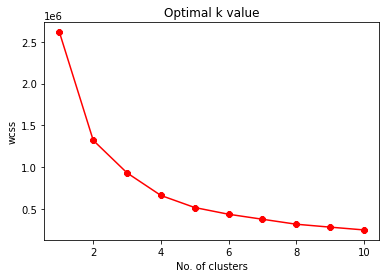

In [8]:
#finding the optimized k values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km=KMeans(n_clusters=i, random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red",marker="8")
plt.title('Optimal k value')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
 #fitting the k means to the dataset with k = 4
model=KMeans(n_clusters=4, random_state=0)
y_means = model.fit_predict(X)

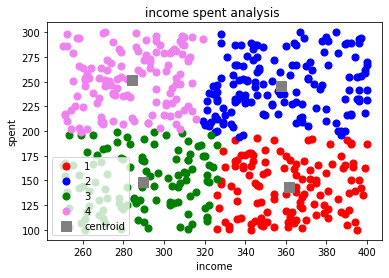

 cluster 1:customer with medium income and low spend 
 cluster 2:customer with high income and medium to high spend 
 cluster 3:customer with low income  
 cluster 4:customer with medium income and high spend


In [21]:
#visualizing the clusers for k = 4 (clusters=1,2,3,4)
#1:customer with medium income and low spend 
#2:customer with high income and medium to high spend
#3:customer with low income 
#4:customer with medium income and high spend

plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='violet',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='gray', label='centroid')
plt.title('income spent analysis ')
plt.xlabel('income')
plt.ylabel('spent')
plt.legend()
plt.show()
print(" cluster 1:customer with medium income and low spend \n cluster 2:customer with high income and medium to high spend \n cluster 3:customer with low income  \n cluster 4:customer with medium income and high spend")